---

# **Project 1: SHAPLEY Values**

### **Definition of Shapley Value**
In the context of machine learning, the Shapley value assigns each feature an importance value for a particular prediction. It answers the question:

**"How much does each feature contribute to the difference between the model's prediction for a specific instance and the average prediction (baseline)?"**

Mathematically, the Shapley value for a feature \( i \) is defined as:

$$
\phi_i = \sum_{S \subseteq F \setminus \{i\}} \frac{|S|! (|F| - |S| - 1)!}{|F|!} \left( v(S \cup \{i\}) - v(S) \right)
$$

Where:
- \( F \): The set of all features.
- \( S \): A subset of features that does not include feature \( i \).
- \( v(S) \): The value function, which evaluates the model's prediction for a subset of features \( S \).
- \( |S| \): The number of features in subset \( S \).
- \( |F| \): The total number of features.

---

### **Key Properties of Shapley Values**
The Shapley value has four key properties that make it a fair and unique solution for feature attribution:

1. **Efficiency**:
   The sum of the Shapley values for all features equals the difference between the model's prediction and the average prediction (baseline).
   
   $$
   \sum_{i=1}^n \phi_i = v(F) - v(\emptyset)
   $$

2. **Symmetry**:
   If two features contribute equally to all possible subsets, their Shapley values are the same.

3. **Dummy**:
   If a feature does not contribute to any subset, its Shapley value is zero.

4. **Additivity**:
   If two games (models) are combined, the Shapley value of the combined game is the sum of the Shapley values of the individual games.

---

### **Interpretation in Machine Learning**
In machine learning, the Shapley value for a feature \( i \) represents:
- **Positive value**: The feature increases the model's prediction compared to the baseline.
- **Negative value**: The feature decreases the model's prediction compared to the baseline.
- **Magnitude**: The size of the value indicates the strength of the feature's contribution.

### **Application of Shapley Values to Explain Boston Housing Prices**
In this projet, we use Shapley values to explain how each feature (e.g., number of rooms, crime rate, etc.) contributes to the predicted housing price in the Boston Housing dataset.

---
### **Load and Prepare Data**

In [1]:
import pandas as pd

# Load the dataset from a URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Split into features (X) and target (y)
X = data.drop("medv", axis=1)
y = data["medv"]
# Display the first few rows
print(X.head())

print(y.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


---
### **Split the Data into Training and Testing Sets**
We split the data into training and testing sets using the `train_test_split` function from `sklearn`.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


---

### **Feature Description**
We explore the dataset's features and analyze the correlation between them.

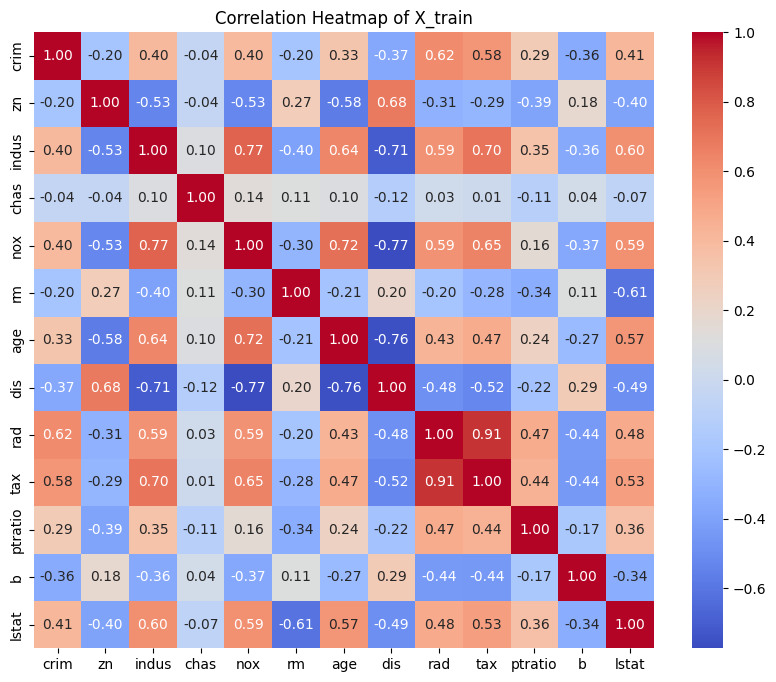

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of X_train")
plt.show()

Additionally, we use violin plots to visualize the distributions of numerical features:

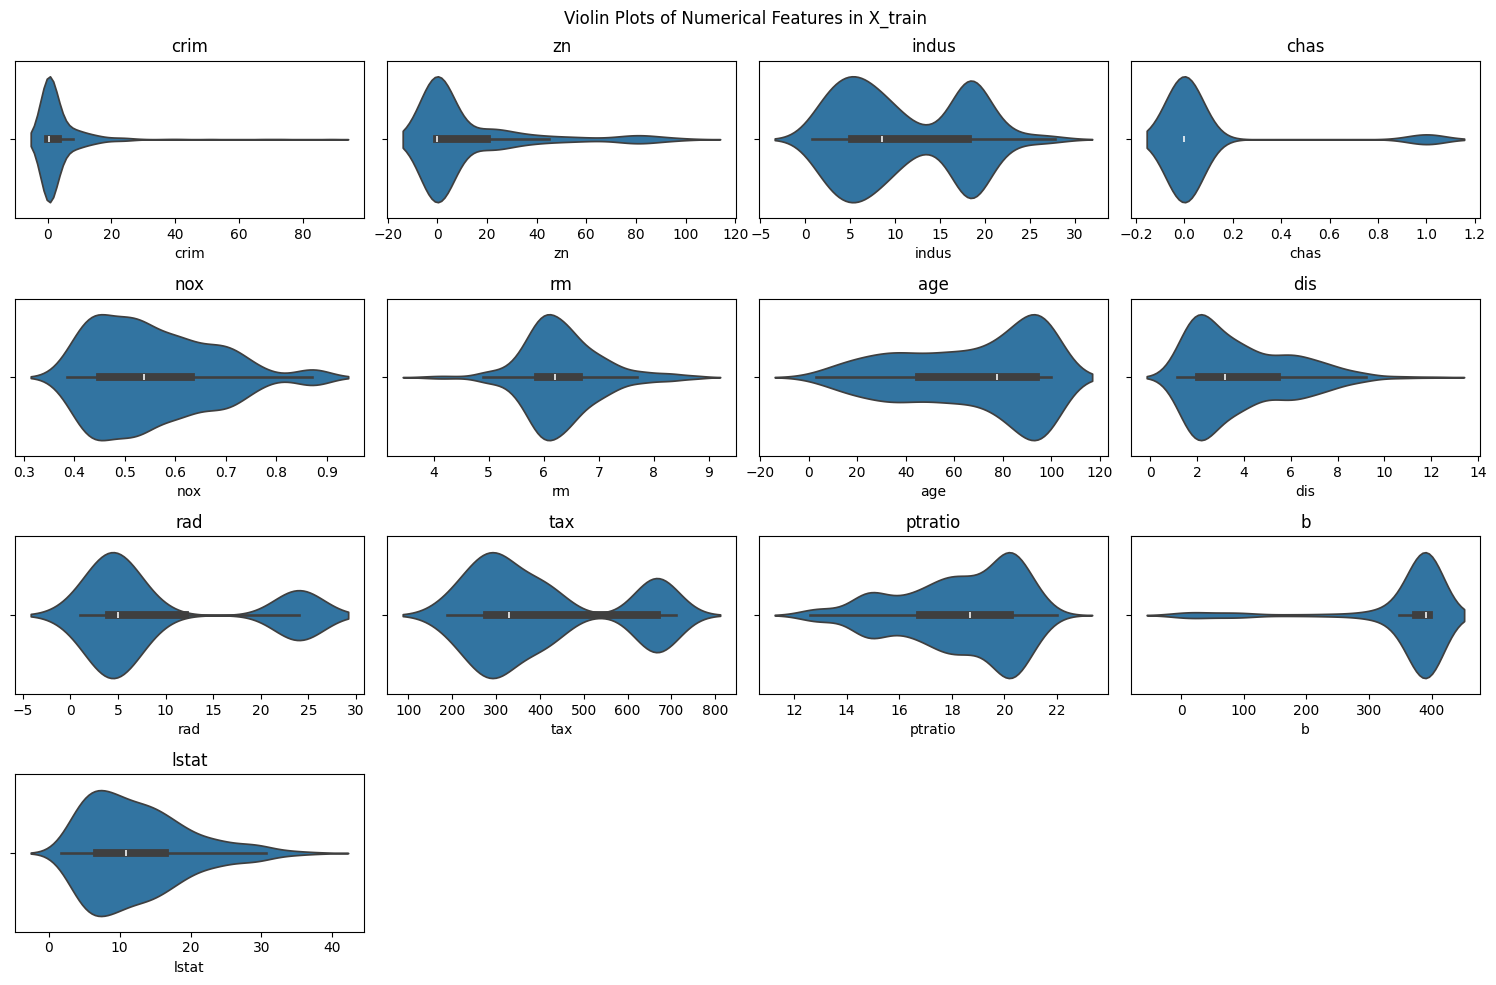

In [4]:
# Plot violin plots for all numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 4, i + 1)
    sns.violinplot(x=X_train[column])
    plt.title(column)
plt.suptitle("Violin Plots of Numerical Features in X_train")
plt.tight_layout()
plt.show()


---
### **Target Description**
We visualize the distribution of the target variable, Boston housing prices, and fit a Gaussian curve to the target variable.

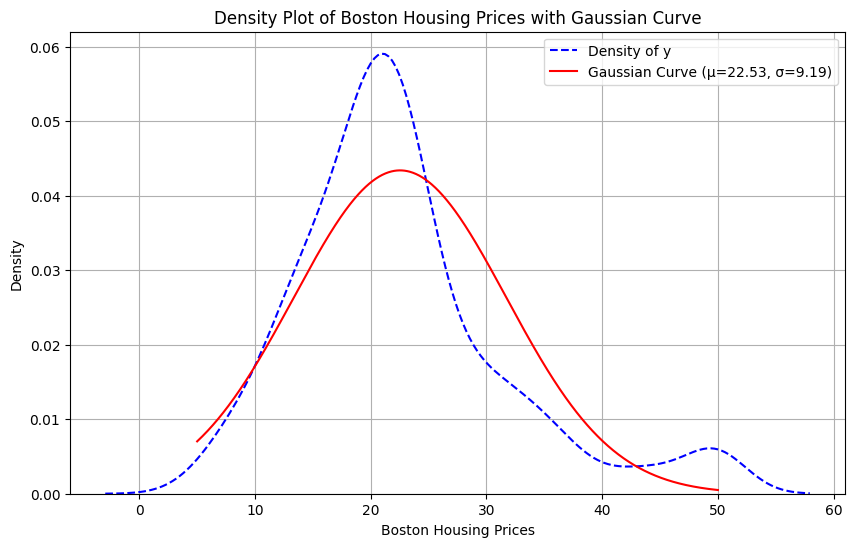

In [5]:
import numpy as np
from scipy.stats import norm

# Fit a Gaussian curve to y
mu, std = norm.fit(y)  # Mean and standard deviation of y
x = np.linspace(min(y), max(y), 1000)  # Create a range of x values
gaussian_curve = norm.pdf(x, mu, std)  # Gaussian curve values

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the density of y
sns.kdeplot(y, label="Density of y", color="blue", linestyle="--")

# Overlay the Gaussian curve
plt.plot(x, gaussian_curve, 'r', label=f"Gaussian Curve (μ={mu:.2f}, σ={std:.2f})")

# Add labels and legend
plt.xlabel("Boston Housing Prices")
plt.ylabel("Density")
plt.title("Density Plot of Boston Housing Prices with Gaussian Curve")
plt.legend()
plt.grid(True)
plt.show()

---
### **Random Forest Model Training**

Here, we train a Random Forest model to predict Boston housing prices.


In [6]:
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score:", model.score(X_test, y_test))

Model R^2 score: 0.8922527442109116


---
### **Shapley Model Building**

In this section, we use the SHAP library to calculate and visualize Shapley values for model predictions.

In [7]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Display SHAP values for the first prediction
print("SHAP values for the first prediction:", shap_values[0])

SHAP values for the first prediction: [ 4.94814988e-01  9.63193575e-03 -4.92033210e-02 -1.53592017e-03
  2.34402880e-01 -2.22955747e+00 -2.98741304e-01  4.13816856e-02
  2.76196912e-02 -3.10143239e-02  3.08113843e-01  2.79785266e-02
  1.41833899e+00]


The Shapley values provide insights into how each feature contributes to the model's prediction for a specific instance.

* Positive contribution: Features like `LSTAT` (lower status population), `crim` (Per capita crime rate by town), `ptratio`(pupil-teacher ratio by town), `nox` (nitrogen oxides concentration) increase the predicted housing price.

* Negative contribution: Features like `rm` (average number of rooms per dwelling), age decrease the predicted housing price.

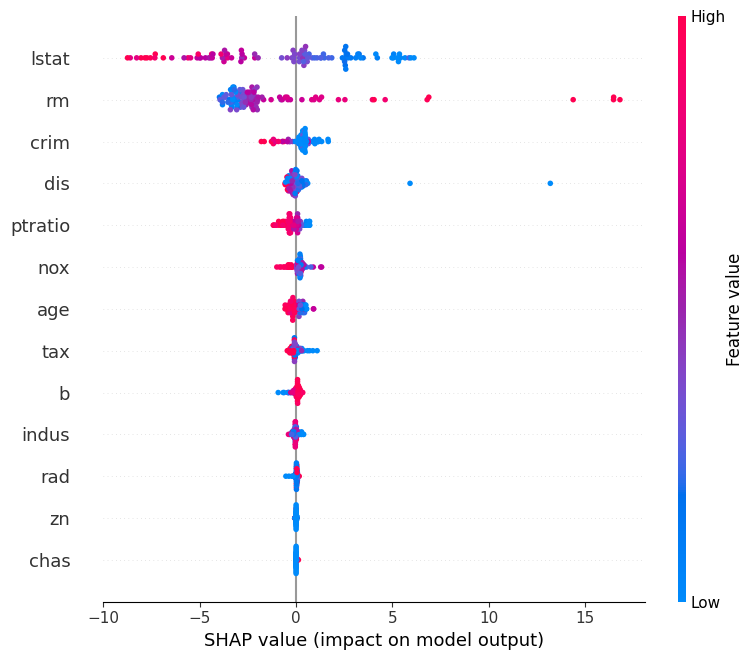

In [8]:
# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test,)

In [13]:
# Initialize JavaScript visualization
shap.initjs()  # Initialize JavaScript visualization

# Display a force plot for the first instance
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

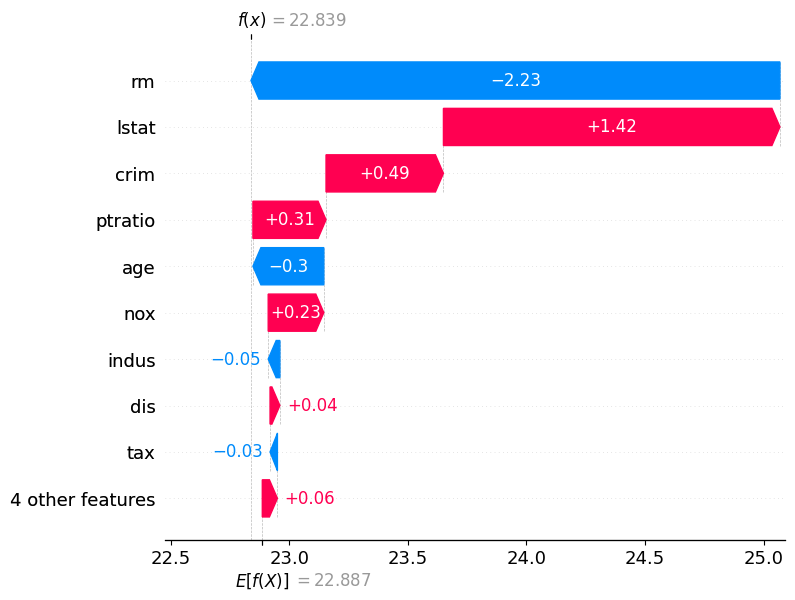

In [10]:
# Legacy waterfall plot for the first instance
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0], feature_names=X_test.columns)

In [11]:
print("Expected value shape:", explainer.expected_value.shape)
print("Shap values shape:", shap_values.shape)

Expected value shape: (1,)
Shap values shape: (102, 13)


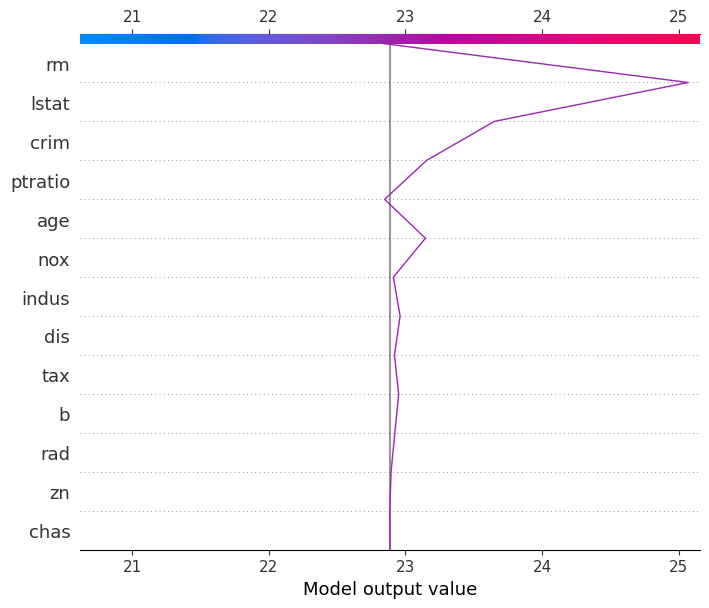

In [12]:
# Decision plot for the first instance
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)

---
## **Conclusion**

This projet demonstrates the application of Shapley values to explain the impact of individual features on the predictions made by a machine learning model, specifically a Random Forest model for predicting housing prices in the Boston Housing dataset. The various visualizations provided, such as summary plots, force plots, and waterfall plots, help in understanding the feature contributions and their effects on the model’s predictions.
